## Overview
In this activity, I’m diving deeper into the dataset. The goal here is to prepare the data for analysis, do some exploratory data analysis (EDA), and build visualizations that tell a story. This should help drive more informed data backed decisions.

This activity is broken down into four main parts:

### Part 1: Imports, Links, and Loading
I’ll start importing the necessary Python libraries and loading the dataset into a pandas DataFrame so I can start working with it.

### Part 2: Data Exploration
In this section, I’ll get to know the structure of the data, check for missing values or inconsistencies, and clean things up so everything is ready for analysis.

### Part 3: Build Visualizations
I wil also create visualizations to help better understand the relationships between key variables—especially anything interesting that came up in the earlier steps.

### Part 4: Evaluate and Share Results
Finally, I will try to reflect on what the data is telling me, summarize the key findings, and think about how these insights might be useful to the TikTok data team.

------------------------------------------------------------------------------------------------------

## 1- PACE: Plan
As part of planning stage, I will start by identifying any outliers in the data. 

I will use a couple of simple tools:

Numpy : I’ll look at the mean() and median() of numeric columns to get a feel for the data’s central tendency and overall range.

Boxplots : Visuals always help, so I will try to generate boxplots to see if there are any extreme values standing out.

## What should I Do With Outliers ?
Not all outliers are bad  but some of them might be important! but depending on the project goals, I will decide whether to:

- Delete them if they look like obvious errors or typos 

- Reassign them if the dataset is small or if I need to smooth the data for a sensitive model.

- Leave them as-is if I’m just doing EDA or if the model I plan to use can handle them well.


To get started with exploring the dataset, I will import the key Python libraries that are commonly used for data analysis and visualization:

1- Pandas for data manipulation.
2- Numpy for numerical operations.
3- Matplotlib.pyplot and seaborn for creating visualizations.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Load the dataset into a pandas DataFrame


In [3]:
data = pd.read_csv("/Users/sufyanalwjali/Desktop/Data analysis/Tik_Tok_Project-/tiktok_dataset.csv")

## 2- PACE: Analyze

let's take a good look at the dataset to understand its structure, spot any issues, and decide what needs cleaning.

I’ll start with some key functions to get an overview of the data:


In [4]:
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [9]:
data.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [10]:
# Get summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [14]:
data.size

232584

In [15]:
data.shape

(19382, 12)

Now that I’ve identified the key columns in the TikTok dataset, I’ve selected visualization types that will help me explore patterns, understand distributions, and communicate insights effectively.

Box plots and histograms are especially useful for analyzing the distribution of engagement metrics like views, likes, and shares. These visuals can highlight outliers, skewness, and variability in the data—insights that are important when deciding on the next steps in the analysis. Understanding the data distribution will also guide which statistical methods or models are most appropriate moving forward.

## 3- PACE: Construct
Now we have assessed the data, it’s time to plot out visualizations.
 

Let's Create a box plot to examine the spread of values in the video_duration_sec column.

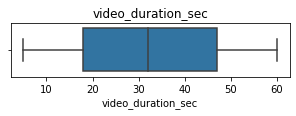

In [5]:
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec']);

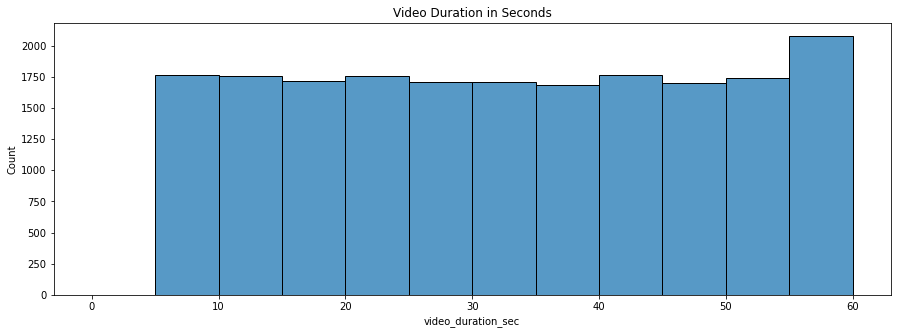

In [6]:
plt.figure(figsize=(15, 5))
sns.histplot(data['video_duration_sec'], bins=range(0, 61, 5))
plt.title('Video Duration in Seconds')
plt.show()

Videos are 5 to 60 seconds long. Most are spread out evenly, but there are more videos that are 55–60 seconds.

Let's do the same thing but with video_view_count.

/Users/sufyanalwjali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


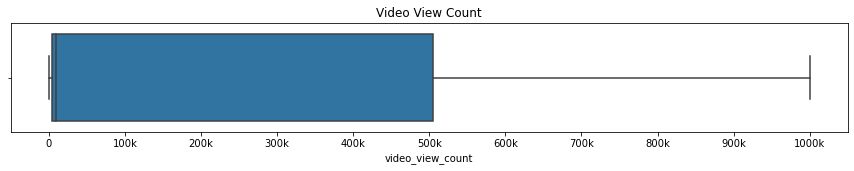

In [7]:
plt.figure(figsize=(15, 2))
vvc = sns.boxplot(data['video_view_count'])
plt.title('Video View Count')
labels = [0] + [str(i) + 'k' for i in range(100, 1001, 100)]
vvc.set_xticks(range(0, 1000001, 100000))
vvc.set_xticklabels(labels=labels)
plt.show()

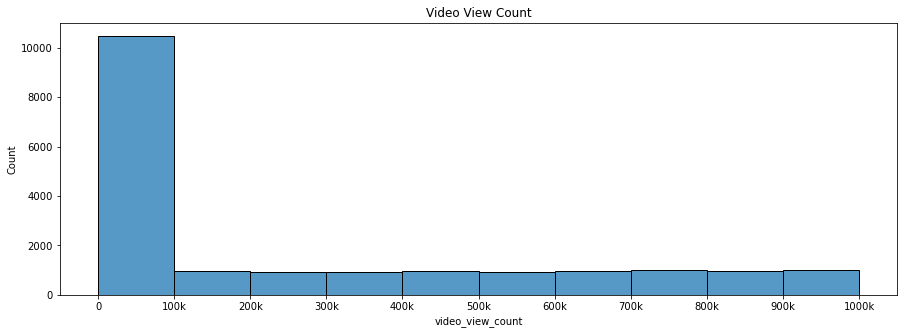

In [8]:
plt.figure(figsize=(15, 5))
vvc = sns.histplot(data['video_view_count'], bins=range(0, 1000001, 100000))
plt.title('Video View Count')
labels = [0] + [str(i) + 'k' for i in range(100, 1001, 100)]
vvc.set_xticks(range(0, 1000001, 100000))
vvc.set_xticklabels(labels=labels)
plt.show()

The distribution of video views is heavily right skewed and not not evenly distributed
with most videos receiving low view counts. A small number of viral videos get extremely high views, creating outliers that pull the average upward.

Let's see and examine the spread of values in the video_like_count column.

/Users/sufyanalwjali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


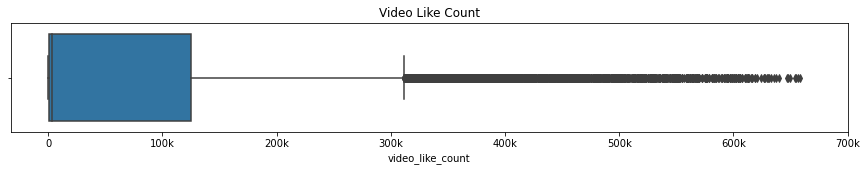

In [9]:
plt.figure(figsize=(15, 2))
vlc = sns.boxplot(data['video_like_count'])
plt.title('Video Like Count')
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
vlc.set_xticks(range(0, 700001, 100000))
vlc.set_xticklabels(labels=labels)
plt.show()

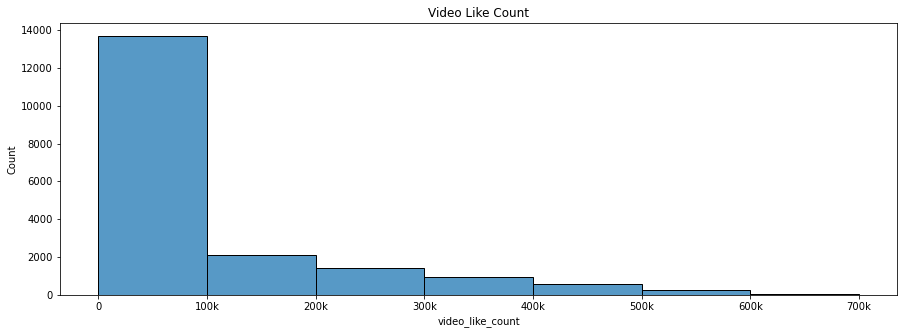

In [10]:
plt.figure(figsize=(15, 5))
vlc = sns.histplot(data['video_like_count'], bins=range(0, 700001, 100000))
plt.title('Video Like Count')
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
vlc.set_xticks(range(0, 700001, 100000))
vlc.set_xticklabels(labels=labels)
plt.show()

The distribution of likes is clearly right-skewed, with around 14,000 videos having 100k likes or less. As like counts increase, the number of videos drops sharply—especially beyond 700k—indicating that high-like videos are rare outliers.

/Users/sufyanalwjali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


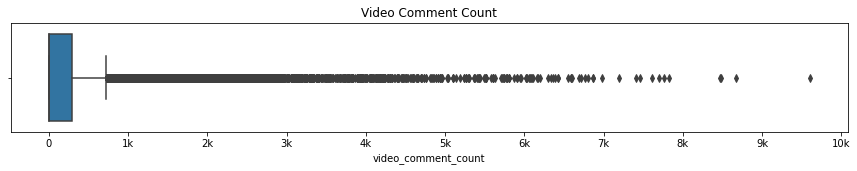

In [12]:
plt.figure(figsize=(15, 2))
vcc = sns.boxplot(data['video_comment_count'])
plt.title('Video Comment Count')
labels = [0] + [str(i) + 'k' for i in range(1, 11, 1)]
vcc.set_xticks(range(0, 10001, 1000))
vcc.set_xticklabels(labels=labels)
plt.show()

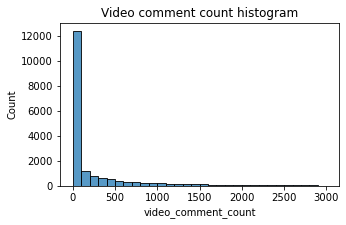

In [4]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

Most videos have fewer than 100 comments, with the majority clustered at the low end of the range. The distribution is highly skewed to the right , showing that only a few videos receive a large number of comments.

Video share count



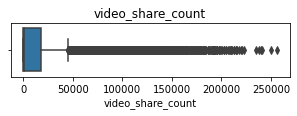

In [5]:
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

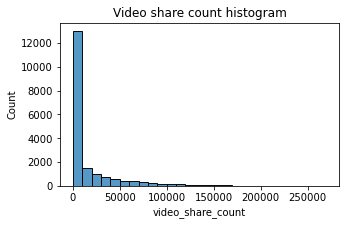

In [6]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

Most videos had fewer than 10,000 shares, with only a few getting significantly more. The distribution is heavily right-skewed.

video download count

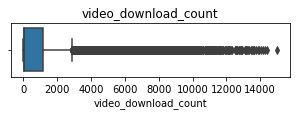

In [7]:
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);

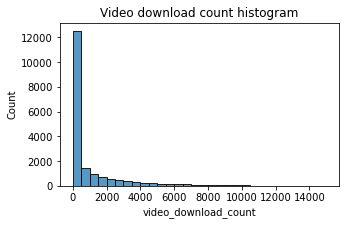

In [8]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

Most videos were downloaded fewer than 500 times, while a few exceeded 12,000 downloads. This shows a strong right-skew in the distribution.

--------------------------------------------------------------------------------------------------

Now Let’s see and explore how claim status is distributed across different Verification Statuses. This will help us see if verified accounts are more likely to post claims or opinions.

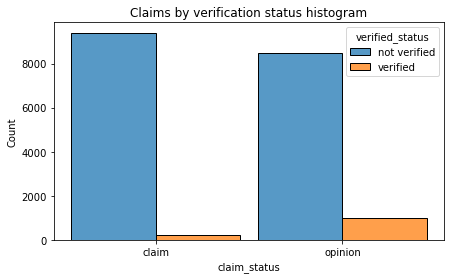

In [9]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
            x='claim_status',
            hue='verified_status',
            multiple='dodge',
            shrink=0.9)
plt.title('Claims by verification status histogram');

There are significantly fewer verified users, but they tend to post opinions more often than claims. Unverified users post a mix of both.

Let’s look at how Claim Status varies by Author Ban Status.

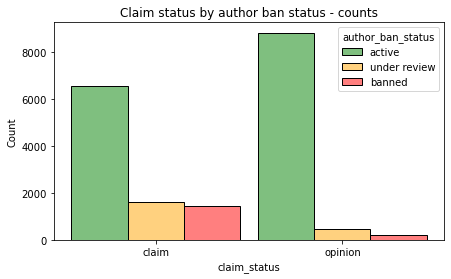

In [10]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

Both claim and opinion videos are mostly posted by active authors, but the proportion of active authors is much higher for opinion videos. This suggests that authors who post claims are more likely to be reviewed or banned.

Median view counts by ban status

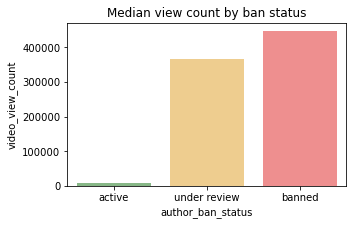

In [11]:
ban_status_counts = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
           x='author_ban_status',
           y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)

plt.title('Median view count by ban status');

Non-active authors have much higher median view counts than active authors. Since they’re more likely to post claims, and claim videos tend to get more views overall, video_view_count could be a strong indicator of claim status

In [12]:
data.groupby('claim_status').median()['video_view_count']

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

Total views by claim status

In [18]:
views_by_claim = data.groupby('claim_status')['video_view_count'].sum().reset_index()

# Create pie chart
fig = px.pie(
    views_by_claim,
    values='video_view_count',
    names='claim_status',
    title='Total Views by Video Claim Status'
)

fig.show()

Even though the dataset has a similar number of claim and opinion videos, claim videos account for the majority of total views, showing they get significantly more attention overall.

### Determine outliers 
Outliers can affect predictive models, such as when predicting video views on TikTok, where extremely high views may skew results. In this case, there's no issue with how the data was recorded, and viral content is expected to have high engagement.

To identify outliers, let's Test and use the interquartile range (IQR) method. Since the TikTok data is skewed, we should calculate the median and then add 1.5 * IQR to set an outlier threshold. 
This method helps identify outliers without overestimating the threshold.

In [19]:
count_cols = ['video_view_count',
             'video_like_count',
             'video_share_count',
             'video_download_count',
             'video_comment_count']

for column in count_cols:
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    median = data[column].median()
    outlier_threshold = median + 1.5 * iqr
    
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


<AxesSubplot:xlabel='video_like_count', ylabel='video_comment_count'>

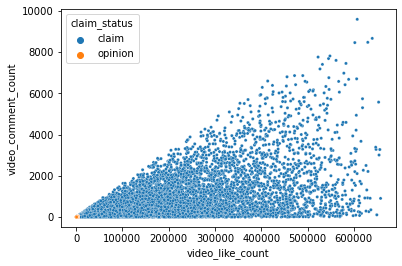

In [20]:
sns.scatterplot(x=data['video_like_count'],y=data['video_comment_count'],hue=data['claim_status'],s=10)


<AxesSubplot:xlabel='video_like_count', ylabel='video_comment_count'>

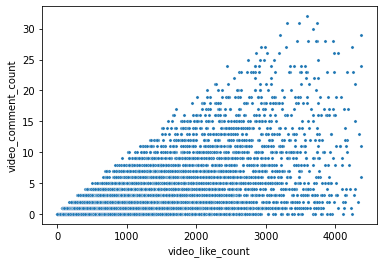

In [21]:
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion['video_like_count'],y=opinion['video_comment_count'],s=10)

### 4- PACE: Execute
Results and evaluation and What I've Learned:

I’ve examined data distribution, frequencies, central tendencies (mean, median), outliers, and missing data. I also analyzed correlations, focusing on claim status.

My Other Questions:
I want to explore characteristics unique to claims versus opinions, and investigate other potential predictors for claim status.

#### - Conclusion
Exploratory Data Analysis (EDA) is essential because it allows a data professional to deeply understand the dataset identifying outliers, addressing missing values, and preparing the data for modeling. By visualizing the data, we can gain insights quickly and identify trends or patterns that may inform model development.

Through this analysis, we’ve learned that key decisions must be made before building a model. These include handling outliers, duplicate values, and missing data. Visualizations such as scatterplots, histograms, and boxplots were invaluable in uncovering correlations and understanding the distribution of the data.

Other potential visuals that could further enhance our understanding include heatmaps for correlation matrices, time series plots (if applicable), and bar charts for categorical comparisons.

These insights will guide us in making informed choices as we move toward developing a predictive model.